# Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [3]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculationsGeneration(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

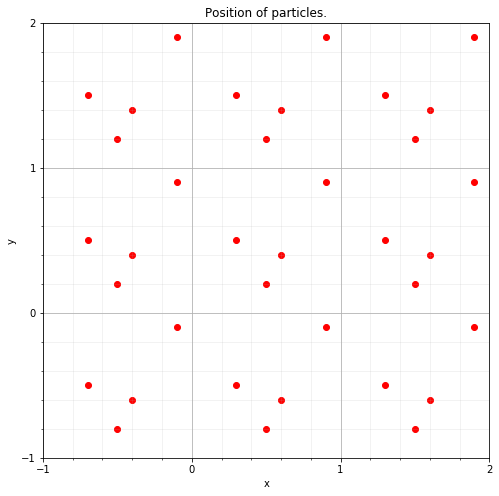

11486539.900954507

In [4]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerTrio)

In [5]:
potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1)# Results from wolfram are 206084

206084

## Testing quality of potential energy particle

In [6]:
def potentialEnergyPerTrioExperimental(lengths, E0=1, Rc=1):
    """
    """
    Mc = 1/(36*np.sqrt(3))
    A0 = 4
    
    a = Mc * lengths[0] / Rc
    b = Mc * lengths[1] / Rc
    c = Mc * lengths[2] / Rc
    
    s = (a + b + c) / 2
    area2Triangle = s * (s - a) * (s - b) * (s - c)
    
    longRangePotential = -area2Triangle * ((a + b + c)**-6)
    shortRangePotential = longRangePotential**2
    
    return E0 * A0 * (shortRangePotential + longRangePotential)

-0.9999944264618896
-0.23437499999999992


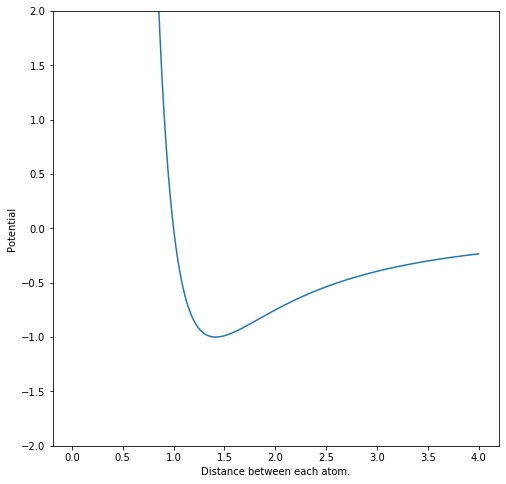

In [7]:
yCoordinates = np.linspace(0.01, 4, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental([yCoordinate, yCoordinate, yCoordinate]))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(-2, 2)
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance between each atom.')
ax.set_ylabel('Potential')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))

-117.21635943732814
-115.55321912889188


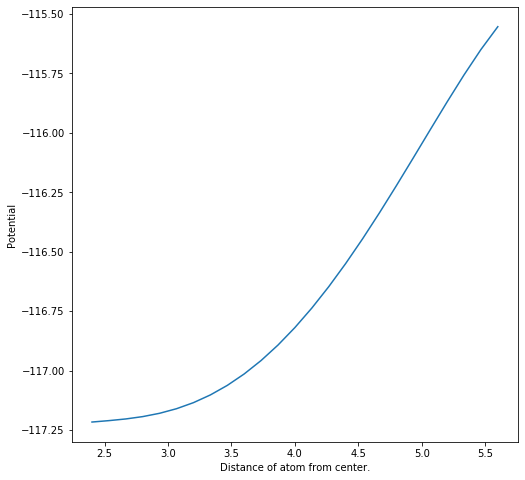

In [8]:
widthOfCell = 16
yCoordinates = np.linspace(0.3*widthOfCell/2, 0.7*widthOfCell/2, 25, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    particles = [np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 - yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 - yCoordinate])]
    otherSpace = generateSpace(particles, 4, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of atom from center.')
ax.set_ylabel('Potential')
print(min(results))
print(max(results))

## Checking convergence

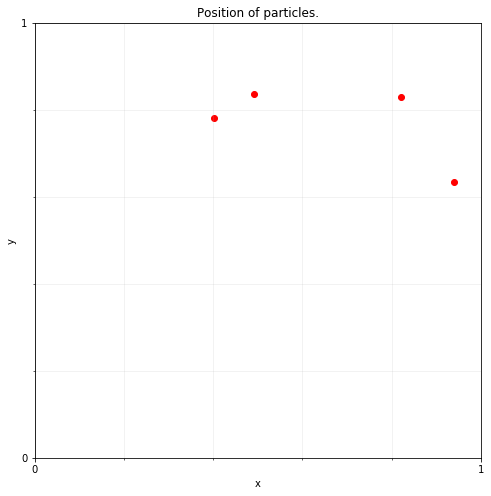

8.401747882242667
-277.6099959869091
-1530.5854946400086
-3639.7335143414634
-6553.662725189365
-10253.780216604486
-14731.204399998307
-19980.965909383627
-25999.99525318666
-32786.26116909762
-40338.34884717398
-48655.232972228165


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

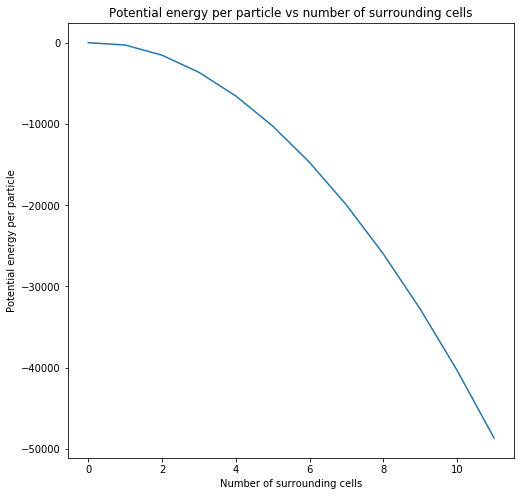

In [9]:
numberOfSurroundingCells = [i for i in range(0,12)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [np.array([random.uniform(0, widthOfCell), random.uniform(0, widthOfCell)]) for j in range(0, 4)]

plotLattice(atoms, widthOfCell)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
72.89916384341922
-154.32256661947827
-1398.888884556948
-3503.9193170971475
-6415.725278368101
-10114.641829926632
-14591.326860220599
-19840.60258518586
-25859.29603077694


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

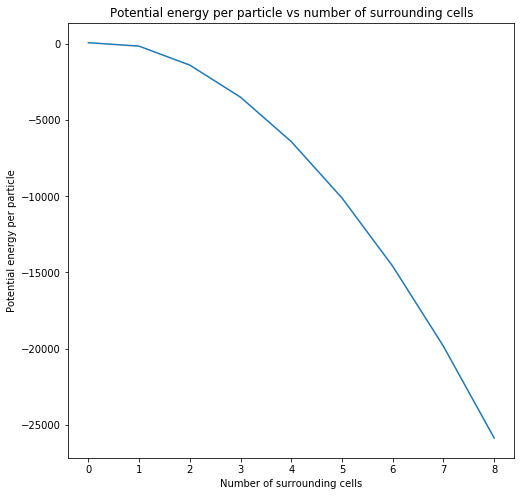

In [10]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
2.2808661998144273
-133.26531595721795
-492.72524349524826
-1050.695331631956
-1802.2786565123188
-2745.8559814356618
-3880.708037119664
-5206.454190446868
-6722.868726862661


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

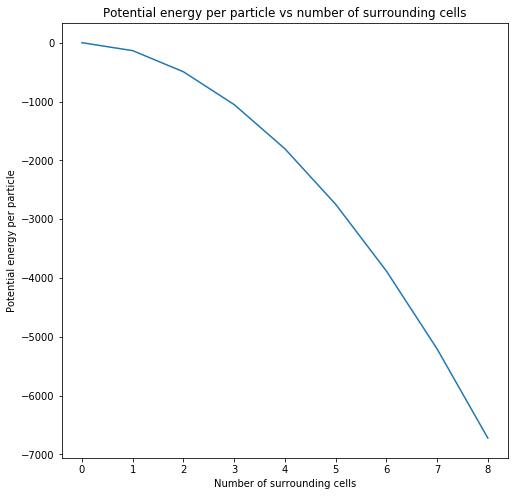

In [11]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 2.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.4262787476114167
-39.2341211332012
-132.11899977106262
-273.59355180534214
-462.9663726855894
-700.0387156059621
-984.7317794088261
-1317.007519121092
-1696.8449766636027


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

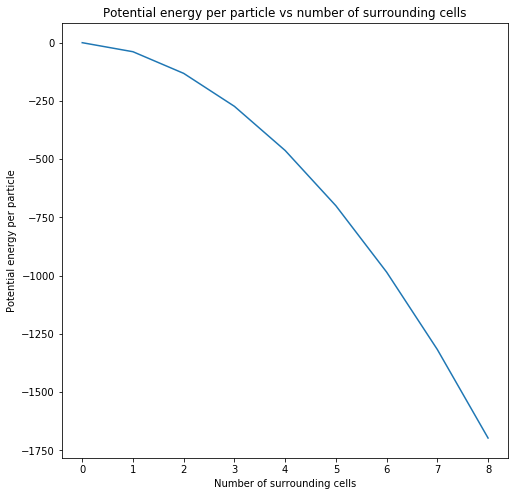

In [12]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 4.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
-0.16885064300066815
-10.17839229229387
-33.58835549884383
-69.08087038241834
-116.51638745623947
-175.8580989169488
-247.0926179852847
-330.2140029996298
-425.21923135014197


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

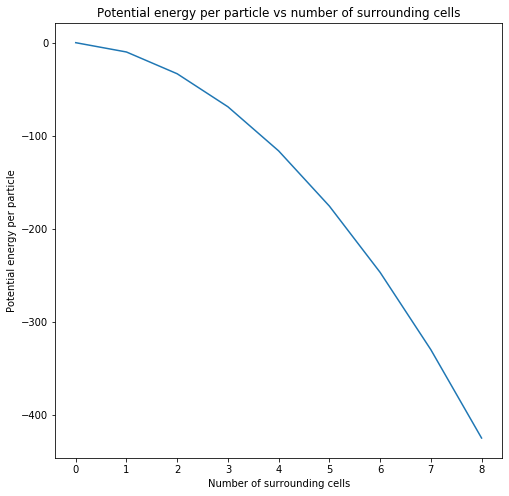

In [13]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 8.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 8.401870727539062e-05, 0.00023205137252807617, 0.0004581031799316406, 0.0007567715644836426, 0.0011581549644470216, 0.0016105704307556152, 0.002155048370361328, 0.0027971539497375487, 0.003477344036102295, 0.004334775447845459]


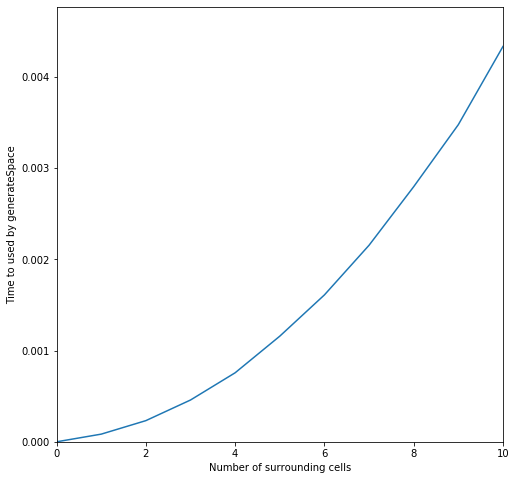

In [14]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)

In [15]:
%timeit potentialEnergyPerTrio(getTriangleLengths(np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])))

20.1 µs ± 963 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Calculating with 0 surrounding cells.
0.0
Calculating with 1 surrounding cells.
0.03679966926574707
Calculating with 2 surrounding cells.
0.2962399323781331
Calculating with 3 surrounding cells.
1.1559611161549885
Calculating with 4 surrounding cells.
3.198472579320272
Calculating with 5 surrounding cells.
7.100418329238892
Calculating with 6 surrounding cells.
14.011564095815023
Calculating with 7 surrounding cells.
25.08492644627889
Calculating with 8 surrounding cells.
41.75249409675598
Calculating with 9 surrounding cells.
64.2599925994873
Calculating with 10 surrounding cells.
95.45917057991028

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0, 0.03679966926574707, 0.2962399323781331, 1.1559611161549885, 3.198472579320272, 7.100418329238892, 14.011564095815023, 25.08492644627889, 41.75249409675598, 64.2599925994873, 95.45917057991028]
[5.9999999999999995e-05, 0.0327, 0.2823, 1.1175, 3.0912599999999997, 6.94086, 13.5879, 24.138299999999997, 39.882299999999994, 62.294459999999994, 93.03366]


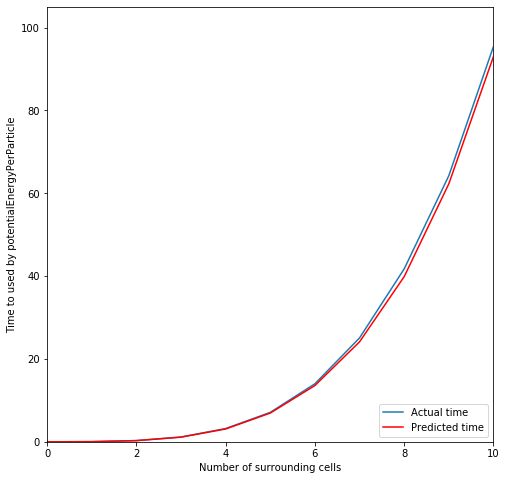

In [16]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 5.0), random.uniform(0, 5.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [predictedCalculationTime(i, len(atoms)) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print(yVariablePredict)

In [17]:
def test(listVectors):
    vectorA = listVectors[0]
    vectorB = listVectors[1]
    diffrences = vectorA - vectorB
    sum = math.pow(diffrences.dot(diffrences), -1)
    

%timeit test([np.array([1, 0]), np.array([1.0, 2])])

5.31 µs ± 47.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
